In [2]:
import pandas as pd
import json
import poloniex
import utils
import numpy as np
from collections import deque
from SimulatorRig import SimRig
import matplotlib.pyplot as plt

In [3]:
% matplotlib inline

In [4]:
configs = utils.loadConfigs()

In [5]:
sim = SimRig("USDT_BTC", 300, 288, configs)

In [6]:
sim.setup('USDT_BTC_november_300.json')

In [7]:
def momentum(crypto, alpha):
    vector = 0
    prev = crypto[0]
    for i in range(1, len(crypto)-1):
        curr = crypto[i]
        new_vec = (curr['weightedAverage'] - prev['weightedAverage'])/(2)
        vector = new_vec + alpha * vector
        prev = curr
    return vector     

In [8]:
def moving_avg(crypto):
    dat = pd.DataFrame(list(crypto))
    lma = np.mean(dat['close'])
    sma = np.mean(dat[int(len(dat)*2/3):]['close'])
    return (sma - lma)/lma

In [9]:
sim.analyzeWith(moving_avg, alpha=0.8)

In [10]:
sim.getHist()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,momentum
0,6417.000000,2017-11-01 00:00:00,6458.168550,6401.000111,6455.000000,38.075354,2.447418e+05,6427.827238,0.000000
1,6417.000000,2017-11-01 00:05:00,6420.000000,6403.000000,6417.000000,6.845150,4.391083e+04,6414.882526,0.000000
2,6424.680000,2017-11-01 00:10:00,6429.000000,6415.000000,6420.000000,5.700171,3.662099e+04,6424.542373,0.000000
3,6379.000000,2017-11-01 00:15:00,6429.000000,6379.000000,6429.000000,24.882572,1.593361e+05,6403.520436,0.000000
4,6399.000000,2017-11-01 00:20:00,6418.881650,6376.931349,6378.931349,19.838993,1.267810e+05,6390.493475,0.000000
5,6410.000000,2017-11-01 00:25:00,6417.975959,6392.000000,6400.000000,3.250305,2.081229e+04,6403.178583,0.000000
6,6401.598402,2017-11-01 00:30:00,6414.001592,6400.000000,6408.000000,10.183181,6.524004e+04,6406.646561,0.000000
7,6390.000000,2017-11-01 00:35:00,6411.659072,6389.000000,6401.598402,10.266892,6.565854e+04,6395.172155,0.000000
8,6410.000000,2017-11-01 00:40:00,6414.000000,6389.000000,6389.000000,10.787875,6.903810e+04,6399.601256,0.000000
9,6410.233886,2017-11-01 00:45:00,6413.999900,6397.343059,6407.029098,12.430508,7.958090e+04,6402.063173,0.000000


In [11]:
dat = sim.getHist()

In [30]:
dat['buy'] = 0
dat['buy'] += dat['momentum'] >= 0.2
dat['buy'] -= dat['momentum'] <= -0.2

In [31]:
holding = True
val = dat.iloc[0]['close']
diff = 0
for index, row in dat.iterrows():
    if row['buy'] == 1 and not holding:
        holding = True
        diff += val - row['close']
        val = row['close']
    elif row['buy'] == -1 and holding:
        holding = False
        diff += row['close'] - val
        val = row['close']

In [32]:
diff

3846.6513633999994

In [33]:
hold_diff = dat.iloc[len(dat)-1]['close'] - dat.iloc[0]['close']

In [34]:
diff / hold_diff

1.0831152041027201

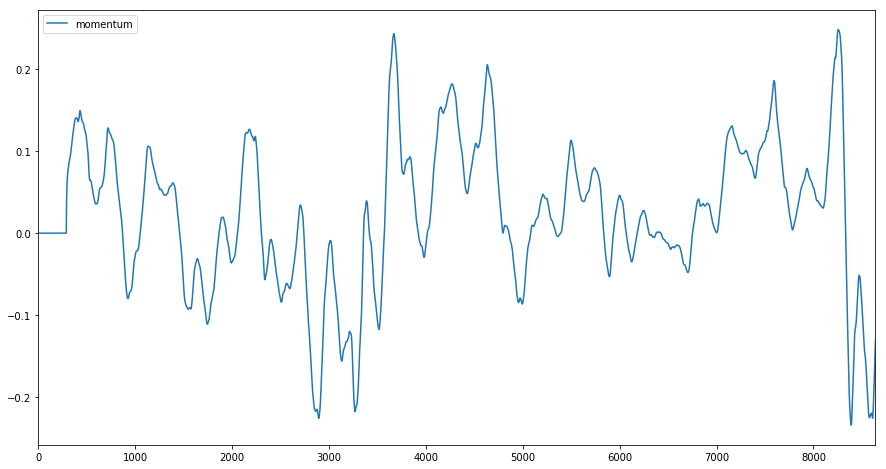

In [35]:
dat.plot(x=dat.index, y='momentum', figsize=(15,8))

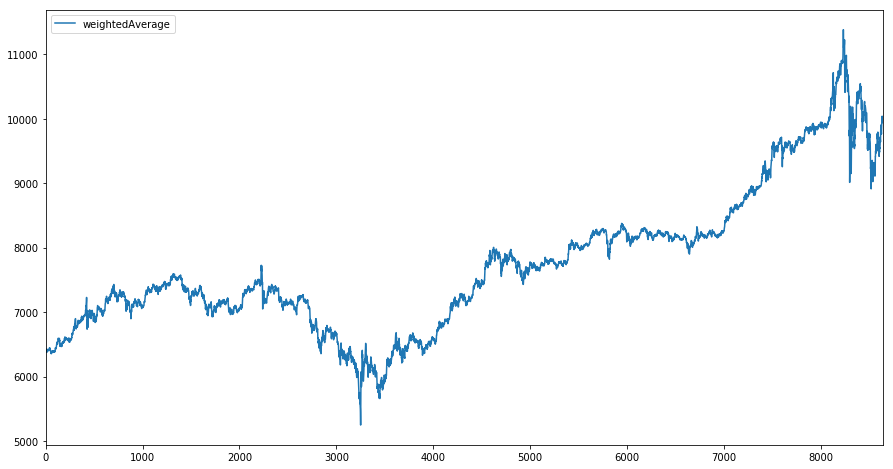

In [36]:
dat.plot(x=dat.index, y='weightedAverage', figsize=(15,8))

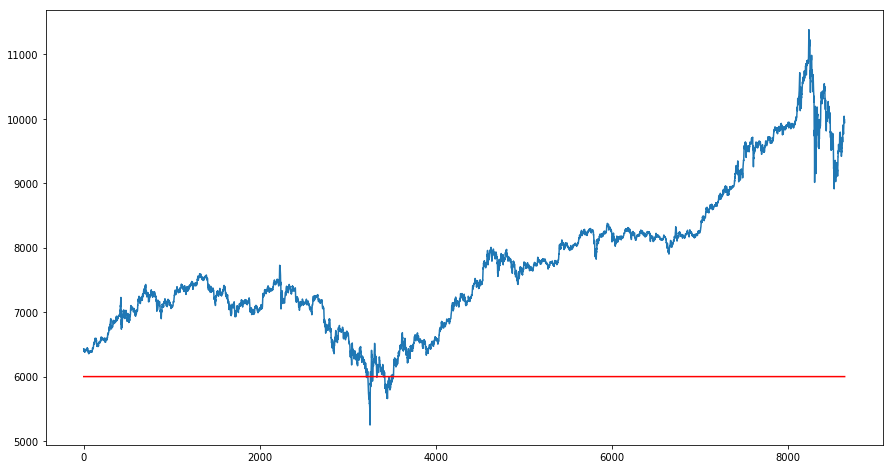

In [38]:
plt.figure(figsize=(15,8))
plt.plot(dat.index, dat['weightedAverage'])
plt.plot(dat.index, 6000+dat['momentum'], color='r')
plt.show()

In [ ]:
sim.getHistIndex()

In [ ]:
1133.9749242/1021.09294953